In [1]:
import tensorflow as tf
tf. __version__

'2.12.0'

In [2]:
!nvidia-smi -L



/bin/bash: nvidia-smi: command not found


**TESTING DATA SENSOR FOR FAULT DETECTION**

In [3]:
import pandas as pd

In [4]:
path="/content/drive/MyDrive/sensor.csv"
df=pd.read_csv(path)

In [5]:
df.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pos,1053152,NaN,NaN,NaN,NaN,NaN,2.0,2.0,30.0,...,7093206.0,3379622.0,7362340.0,8442584.0,8120144.0,5082396.0,6259760.0,176752.0,NaN,NaN


In [6]:
df.shape

(35001, 171)

In [7]:
df.count()

class     35001
aa_000    35001
ab_000     8016
ac_000    32883
ad_000    26054
          ...  
ee_007    34631
ee_008    34631
ee_009    34631
ef_000    33291
eg_000    33292
Length: 171, dtype: int64

In [8]:
df.isnull().sum()

class         0
aa_000        0
ab_000    26985
ac_000     2118
ad_000     8947
          ...  
ee_007      370
ee_008      370
ee_009      370
ef_000     1710
eg_000     1709
Length: 171, dtype: int64

In [9]:
#df.value_counts()

In [10]:
df.index

RangeIndex(start=0, stop=35001, step=1)

In [11]:
df["class"].value_counts()

neg    33924
pos     1077
Name: class, dtype: int64

In [12]:
missing_value_percentage = df.isna().sum().div(df.shape[0])*100
missing_value_percentage

class      0.000000
aa_000     0.000000
ab_000    77.097797
ac_000     6.051256
ad_000    25.562127
            ...    
ee_007     1.057113
ee_008     1.057113
ee_009     1.057113
ef_000     4.885575
eg_000     4.882718
Length: 171, dtype: float64

In [13]:
missing_value_percentage.to_frame()

,0
class,0.000000
aa_000,0.000000
ab_000,77.097797
ac_000,6.051256
ad_000,25.562127
...,...
ee_007,1.057113
ee_008,1.057113
ee_009,1.057113
ef_000,4.885575


In [14]:
pd.DataFrame(missing_value_percentage)

,0
class,0.000000
aa_000,0.000000
ab_000,77.097797
ac_000,6.051256
ad_000,25.562127
...,...
ee_007,1.057113
ee_008,1.057113
ee_009,1.057113
ef_000,4.885575


In [15]:
col_to_drop=missing_value_percentage[missing_value_percentage>70]

In [16]:
col_to_drop.to_frame()

,0
ab_000,77.097797
bn_000,72.537927
bo_000,76.309248
bp_000,78.574898
bq_000,80.297706
br_000,81.211965
cr_000,77.097797


In [17]:
new_dataset = df.drop(col_to_drop.index, axis=1)

In [18]:
new_dataset.head(1)

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,762958,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,8123016.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
RobustScaler=SimpleImputer(strategy="constant", fill_value=0)
SimpleImputer=SimpleImputer()

In [20]:
X= new_dataset.drop(columns="class",axis=1)
y = new_dataset["class"]

In [21]:
class  TargetValueMapping:
    def __init__(self):
        self.neg: int = 0
        self.pos: int = 1
    def to_dict(self):
        return self.__dict__

In [22]:
TargetValueMapping().to_dict()

{'neg': 0, 'pos': 1}

In [23]:
Y=y.replace(TargetValueMapping().to_dict())

In [24]:
Y.head(2)

0    1
1    1
Name: class, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.2, random_state=13)

In [26]:
pipe = Pipeline([('RobustScaler', RobustScaler), ('SimpleImputer', SimpleImputer)])
input_feature_train_arr=pipe.fit_transform(x_train)
target_feature_train_df = y_train

In [27]:
input_feature_test_arr=pipe.fit_transform(x_test)
target_feature_test_df = y_test

In [28]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek()

In [29]:
input_feature_train_final_sample, target_feature_train_final_sample = smt.fit_resample(input_feature_train_arr, target_feature_train_df)


In [30]:
input_feature_test_final_sample, target_feature_test_final_sample = smt.fit_resample(input_feature_test_arr, target_feature_test_df)


In [31]:
input_feature_train_final_sample[0][0:10]

array([ 204.,  140.,   78.,    0.,    0.,    0.,    0.,    0.,    0.,
       6928.])

In [32]:
target_feature_train_final_sample.value_counts()

0    27133
1    27133
Name: class, dtype: int64

In [33]:
target_feature_train_df.value_counts()

0    27140
1      860
Name: class, dtype: int64

In [34]:
import numpy as np
np.ndim(input_feature_train_final_sample)

2

In [35]:
train_arr = np.c_[input_feature_train_final_sample, target_feature_train_final_sample]


In [36]:
test_arr = np.c_[input_feature_test_final_sample, target_feature_test_final_sample]

In [37]:
np.ndim(train_arr)

2

In [38]:
x_train_sample=train_arr[:,:-1]
y_train_sample=train_arr[:,-1]

In [39]:
x_test_sample = test_arr[:,:-1]
y_test_sample = test_arr[:,-1]

In [ ]:
"""
n_estimators=[]
max_depth=[]
min_samples_leaf=[]
min_samples_split=[]

#number of trees:
for i in range(1, 100, 20):
    n_estimators.append(i)

## max_depth branch levels:
for i in range(1, 30, 5):
    max_depth.append(i)

## split leaf node:
for i in range(5, 50, 10):
    min_samples_leaf.append(i)

## split beanchs node:
for i in range(5, 50, 10):
    min_samples_split.append(i)


# number of feature consider at every:
max_features=['log2','sqrt']
"""

In [40]:
import xgboost.XGBClassifier()
#xgbt=xgb.XGBClassifier()

In [41]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier=RandomForestClassifier()

In [ ]:
##ran_cv_1=RandomizedSearchCV(estimator=RandomForestClassifier,param_distributions=para_grid,cv=5, n_iter=100)


In [ ]:
para_grid= {
                "n_estimators":n_estimators,
                "max_depth" : max_depth,

            }

from sklearn.model_selection import RandomizedSearchCV
ran_cv=RandomizedSearchCV(estimator=xgbt,param_distributions=para_grid,cv=3, n_iter=100,verbose=1, n_jobs=1)
ran_cv

print(para_grid)
print(ran_cv)

{'n_estimators': [1, 21, 41, 61, 81], 'max_depth': [1, 6, 11, 16, 21, 26]}
RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                    

In [ ]:
fit_xgb = ran_cv.fit(x_train_sample,y_train_sample)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [ ]:
print(fit_xgb.best_score_)
print(fit_xgb.best_params_)


0.9951159276051458
{'n_estimators': 81, 'max_depth': 6}


In [ ]:
import pickle

In [ ]:
pickle.dump(fit_xgb, open("best_param.pkl", "wb"))

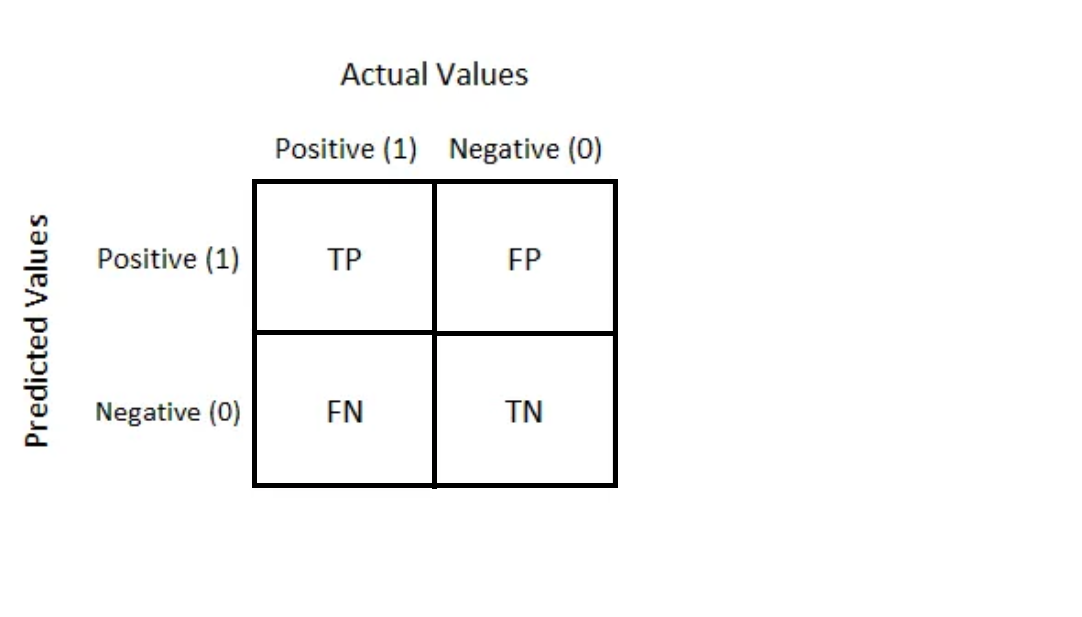


**True Positive**
```
Interpretation: You predicted positive and it’s true.

Example : predicted that a woman is pregnant and she actually is.
```

**True Negative:**
```
Interpretation: You predicted negative and it’s true.

Example :  predicted that a man is not pregnant and he actually is not.
```
**False Positive: (Type 1 Error)**
```
Interpretation: You predicted positive and it’s false.

Example : predicted that a man is pregnant but he actually is not.
```
**False Negative: (Type 2 Error)**
```
Interpretation: You predicted negative and it’s false.
Example :  predicted that a woman is not pregnant but she actually is.
```


In [ ]:
y_pred = fit_xgb.predict(x_test_sample)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_sample, y_pred))

[[6748   35]
 [ 206 6577]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_sample, y_pred).ravel()
(tn, fp, fn, tp)


(6748, 35, 206, 6577)

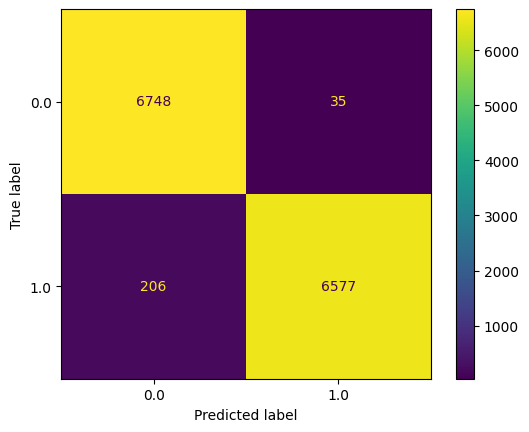

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_sample, y_pred, labels=fit_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=fit_xgb.classes_)

disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import f1_score
F1_score = f1_score(y_test_sample, y_pred)*100
f"{F1_score:.2f}"

'98.20'

**MOdel Improvement**

**GRIDSEARCH_CV**

In [57]:
import xgboost
XGBOOST_=xgboost.XGBClassifier()

In [61]:
para_grid= {
                "n_estimators":[81],
                "max_depth" : [5],

            }
from sklearn.model_selection import GridSearchCV

ran_cv=GridSearchCV(estimator=XGBOOST_,param_grid=para_grid,cv=3,verbose=2, n_jobs=1)
ran_cv

print(para_grid)
print(ran_cv)

{'n_estimators': [81], 'max_depth': [5]}
GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,

In [60]:
fit_xgb = ran_cv.fit(x_train_sample,y_train_sample)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ......max_depth=5, n_estimators=81;, score=0.994 total time=  59.2s
[CV 2/3] END ......max_depth=5, n_estimators=81;, score=0.995 total time=  52.4s
[CV 3/3] END ......max_depth=5, n_estimators=81;, score=0.995 total time=  54.6s


In [62]:
print(fit_xgb.best_score_)
print(fit_xgb.best_params_)

0.9944348329483995
{'max_depth': 5, 'n_estimators': 81}


In [63]:
y_pred_1 = fit_xgb.predict(x_test_sample)
y_pred_1

array([0, 0, 0, ..., 1, 1, 1])

In [64]:
from sklearn.metrics import f1_score
F1_score = f1_score(y_test_sample, y_pred_1)*100
f"{F1_score:.2f}"

'98.21'

In [65]:
print((fit_xgb.best_score_))

0.9944348329483995


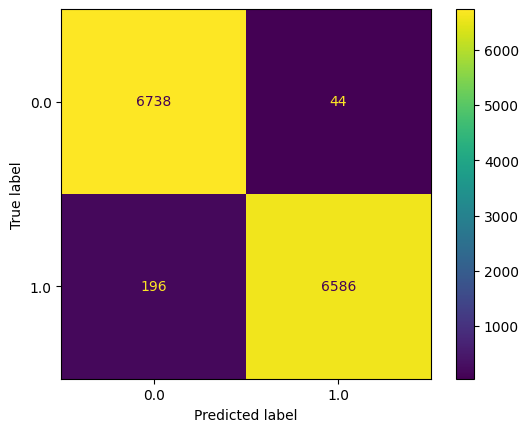

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_sample, y_pred_1, labels=fit_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=fit_xgb.classes_)

disp.plot()
plt.show()

**test text**

In [9]:
import pandas as pd
a=pd.DataFrame({"name":["msn","ms"],"sports":["football","basketball"]})
b=pd.DataFrame({"name":["negi"],"sports":["Criket"]})


In [13]:
print(a)
print(b)

  name      sports
0  msn    football
1   ms  basketball
   name  sports
0  negi  Criket


In [14]:
 df=pd.concat([a,b])
 df

,name,sports
0,msn,football
1,ms,basketball
0,negi,Criket


In [15]:
from datetime import datetime

In [25]:
t=datetime.now()
print(t)

2023-07-01 07:03:29.975353


In [27]:
t.strftime("%H:%M:%S")

'07:03:29'

In [31]:
timestamp = t.strftime('%m_%d_%Y_%H_%M_%S')
timestamp

'07_01_2023_07_03_29'

In [32]:
import os
path=os.path.join('test',timestamp)
os.makedirs(path)

In [33]:
saved_dir=os.path.join('saved_dir')

In [34]:
saved_dir

'saved_dir'

In [38]:
from datetime import datetime

In [43]:
round(datetime.now().timestamp())

1688204595